# Data Pre-processing

In [3]:
#Importing Directories for Data Manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing Directories for Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Date Time Directory

import datetime as dt

In [4]:
#Loading the dataset

data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#Creating a copy of the DataFrame

data1 = data.copy()
data1.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
#Check the Shape of the Dataset

data1.shape

(27820, 12)

In [7]:
#Check the Information of the Dataset

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
#Check the Summary of the Data

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [9]:
#Check the Summary of the Non-Numeric Data

data1.describe(exclude='number').T

,count,unique,top,freq
country,27820,101,Mauritius,382
sex,27820,2,male,13910
age,27820,6,15-24 years,4642
country-year,27820,2321,Albania1987,12
gdp_for_year ($),27820,2321,"2,156,624,900",12
generation,27820,6,Generation X,6408


In [10]:
#Check the count of each unique category in each of the categorical variables

categorical_columns = ['country','sex','age','country-year','generation']

for i in categorical_columns:
    print(data1[i].value_counts())
    print('*'*55)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64
*******************************************************
male      13910
female    13910
Name: sex, dtype: int64
*******************************************************
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64
*******************************************************
Albania1987     12
Poland1993      12
Panama2009      12
Panama2010      12
Panama2011      12
                ..
Austria2016     10
Croatia2016     10
Hungary2016     10
Armenia2016     10
Mongolia2016    10
Name: country-year, Length: 2321, dtype: int64
*****

In [11]:
#Missing Value Treatment

data1.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [12]:
#Missing Value Treatment 2

data1['HDI for year'].value_counts(normalize=True,dropna=False)

NaN      0.699353
0.713    0.003019
0.772    0.003019
0.888    0.003019
0.761    0.002588
           ...   
0.686    0.000431
0.894    0.000431
0.893    0.000431
0.696    0.000431
0.675    0.000431
Name: HDI for year, Length: 306, dtype: float64

In [13]:
#Filling in the missing values

data1['HDI for year'].fillna('Unknown',inplace=True)

In [14]:
data1['HDI for year'].value_counts().head(10)

Unknown    19456
0.713         84
0.772         84
0.888         84
0.761         72
0.909         72
0.83          72
0.756         72
0.827         72
0.793         72
Name: HDI for year, dtype: int64

In [15]:
data1.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [16]:
plt.subplots

<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

# Statistical Visualization Analysis

Univariate Numerical Variable Analysis

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Creating a Function that will help us measure Central Tendency and Dispersion
#The function will take in Univariate Continous variable as an input and 
#Project Histogram and Boxplot for the same

def histogram_boxplot(feature,figsize=(15,10),bins=None):
    
    #NSGF
    f2,(ax_box2,ax_hist2) = plt.subplots(nrows=2,sharex=True,
                                         gridspec_kw={'height_ratios':(0.25,0.75)},figsize=figsize)
    
    #FASC
    sns.set_style('darkgrid')
    sns.boxplot(feature,ax=ax_box2,showmeans=True,color='r')
    
    #FKAB
    sns.distplot(feature,kde=F,ax=ax_hist2,bins=bins) if bins else sns.distplot(feature,kde=True,ax=ax_hist2)
    
    #MCL
    ax_hist2.axvline(np.mean(feature),color='g',linestyle='--')
    ax_hist2.axvline(np.median(feature),color='black',linestyle='-')
    
    #Green color dashed line will indiacte Mean
    #Black solid line will indicate Median

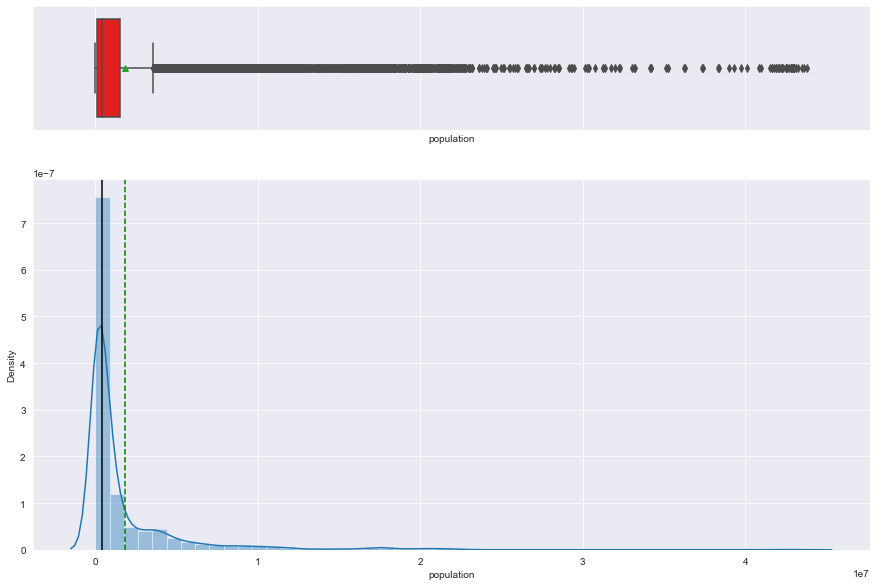

In [30]:
#Statistical analysis of 'population'
histogram_boxplot(data1['population'])

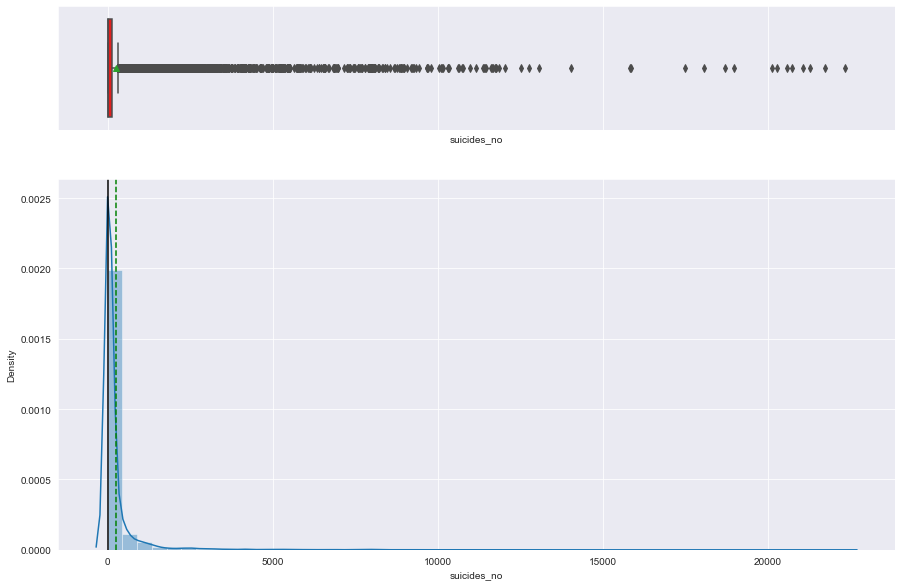

In [31]:
#Statistical analysis of 'Number of Suicides'
histogram_boxplot(data1['suicides_no'])

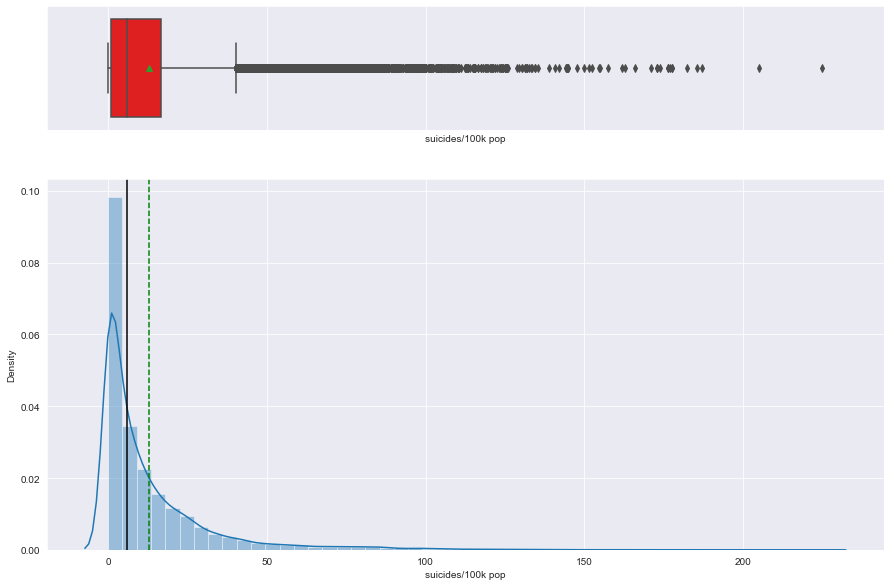

In [32]:
#Statistical analysis of 'Number of Suicides per 100K'
histogram_boxplot(data1['suicides/100k pop'])

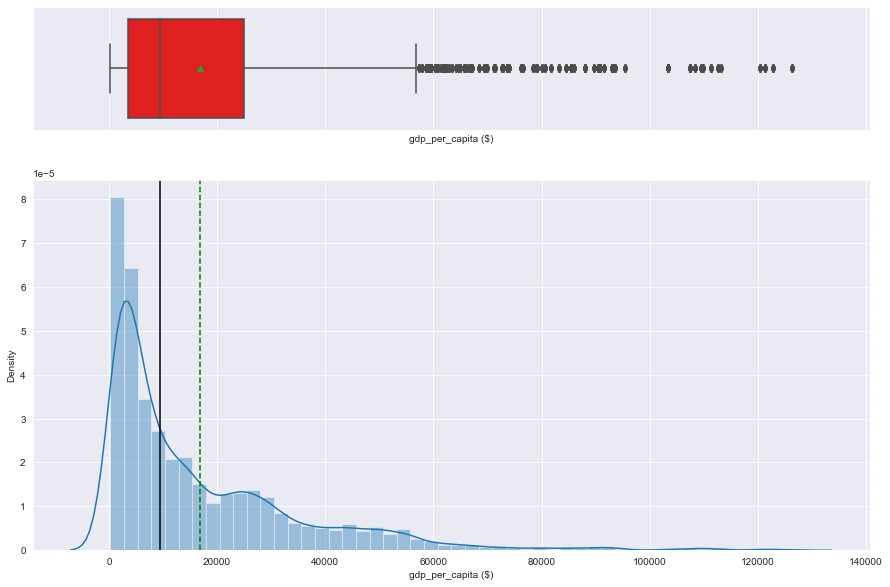

In [33]:
#Statistical analysis of 'Per year GDP'
histogram_boxplot(data1['gdp_per_capita ($)'])

Univariate Categorical Variable Analysis

In [40]:
def bar_perc1(data,z):
    
    total = len(data[z])
    
    plt.figure(figsize=(15,5))
    
    sns.set_style('darkgrid')
    
    ax = sns.countplot(data[z],palette='Paired')
    
    for i in ax.patches:
        
        percentage = '{:.1f}%'.format(100*i.get_height()/total)
        
        x = i.get_x() + i.get_width()/ 2 - 0.05
        
        y = i.get_y() + i.get_height()
        
        ax.annotate(percentage,(x,y),size=12)
        
    plt.show()

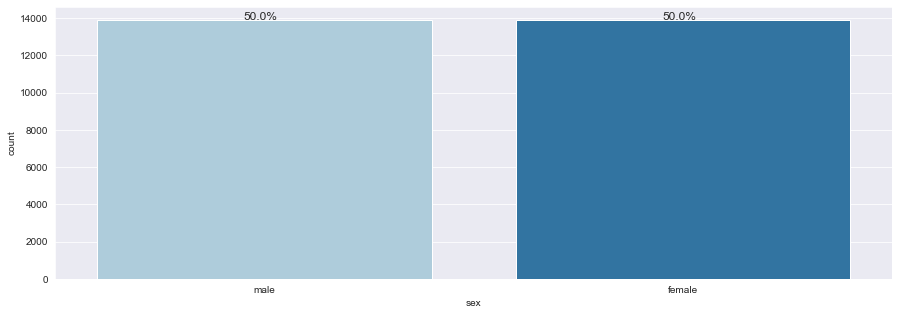

In [41]:
#Percantage of Male Vs Female Data Distribution

bar_perc1(data1,'sex')

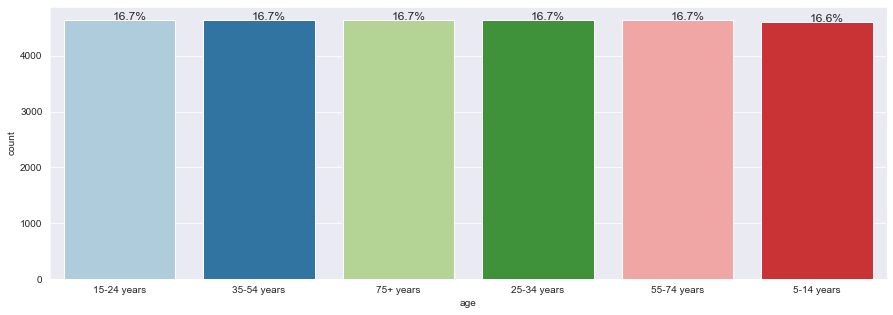

In [42]:
#Percentage of Age Bracket Data Distribution

bar_perc1(data1,'age')

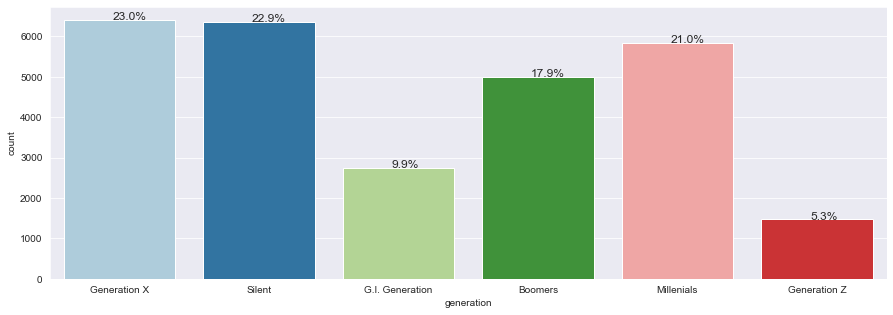

In [43]:
#Percentage of 'Generation' Data in each Category

bar_perc1(data1,'generation')

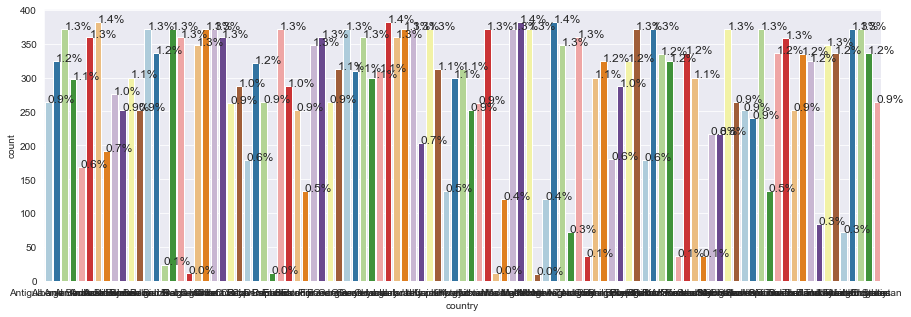

In [44]:
#Percentage of Data Distributed across each Countries
#This is not a good visual Representation for Countries

bar_perc1(data1,'country')

# Addressing the Business Questions

#•	Is the suicide number more prominent in some age categories than others?

<AxesSubplot:ylabel='age'>

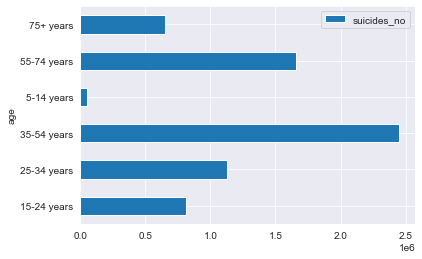

In [45]:
data1.groupby('age')['suicides_no'].sum().to_frame().plot(kind='barh')

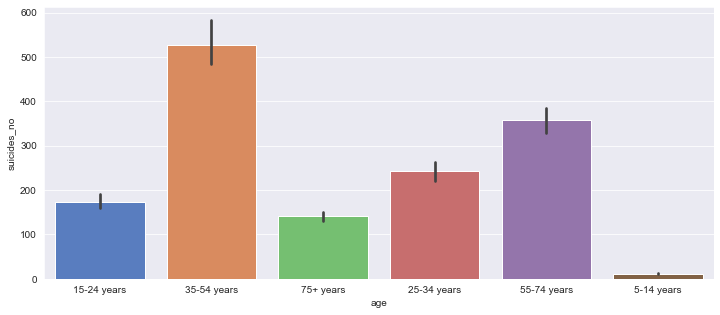

In [46]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='age',y='suicides_no',data=data1,palette='muted')

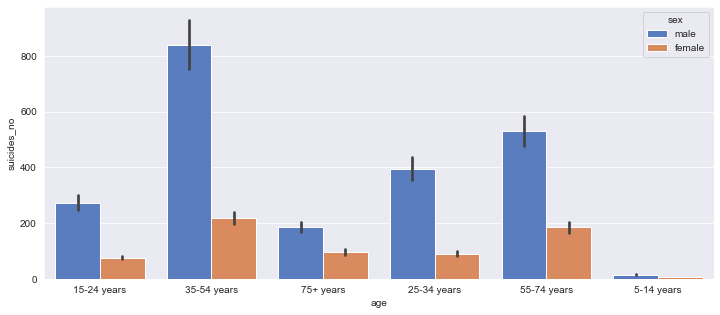

In [47]:
#•	Is the suicide number more prominent in some age categories than others?
#Incorporating how may of them were Men and Women 
# we can add this to tableau (done, 2nd graph)

plt.figure(figsize=(12,5))

ax = sns.barplot(x='age',y='suicides_no',data=data1,palette='muted',hue='sex')

•	Which countries have the highest and the least number of suicides?

In [73]:
#Highest

Text(0.5, 1.0, 'Top 10 countries with highest suicide count')

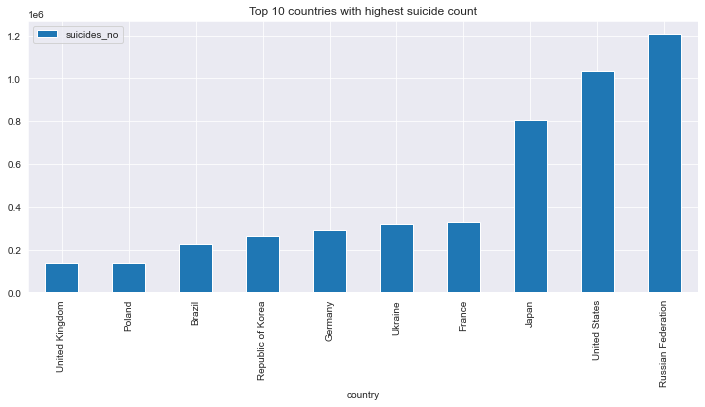

In [48]:
#Top 10 highest country with suicide count(done)

data1.groupby('country')['suicides_no'].sum().to_frame().sort_values('suicides_no').tail(10).plot(kind='bar',figsize=(12,5))
plt.title('Top 10 countries with highest suicide count')

In [88]:
#Lowest

Text(0.5, 1.0, 'Top 10 countries with lowest suicide count')

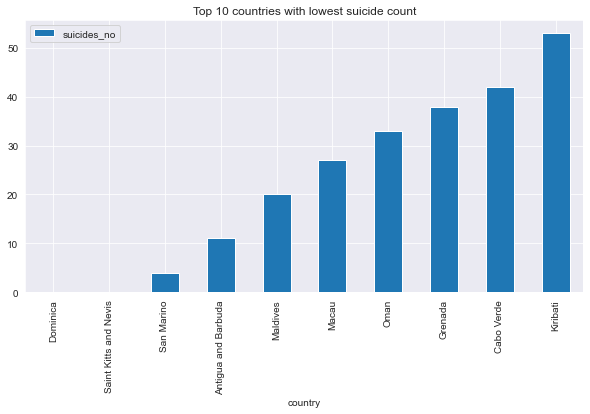

In [49]:
#Top 10 lowest countries with suicide count

data1.groupby('country')['suicides_no'].sum().to_frame().sort_values('suicides_no').head(10).plot(kind='bar',figsize=(10,5))
plt.title('Top 10 countries with lowest suicide count')

•	What is the effect of population on suicide numbers?

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

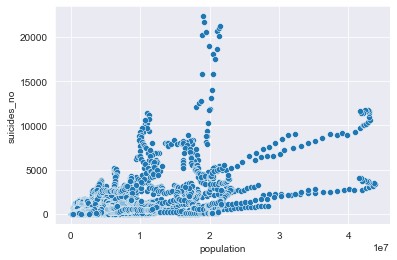

In [50]:
sns.scatterplot(x=data1['population'],y=data1['suicides_no'],data=data1)

•	What is the effect of the GDP of a country on suicide numbers?

Text(0.5, 1.0, 'Graph between GDP per Capita and Suicides/100K Population')

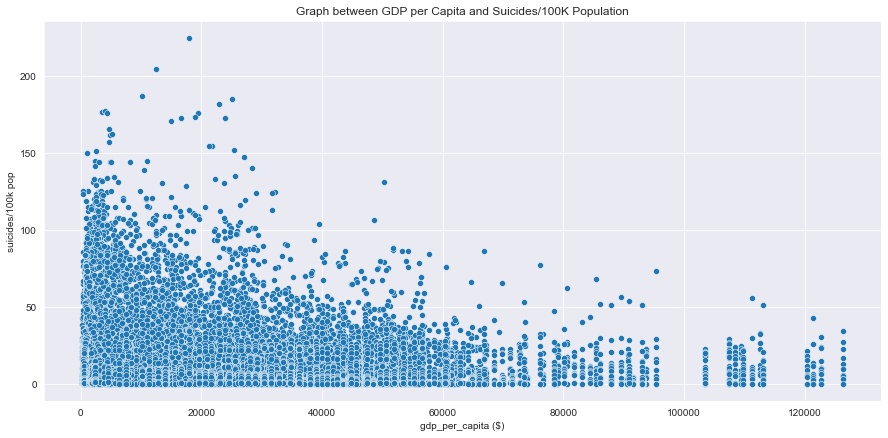

In [51]:
plt.figure(figsize=(15,7))
ax=sns.scatterplot(x=data1['gdp_per_capita ($)'],y=data1['suicides/100k pop'],data=data1)
ax.set_title('Graph between GDP per Capita and Suicides/100K Population')


# With increase in GDP the suicide rate decreases

•	Is there a difference between the suicide numbers of men and women?

Text(0.5, 1.0, 'Suicide count for Men and Women across all years')

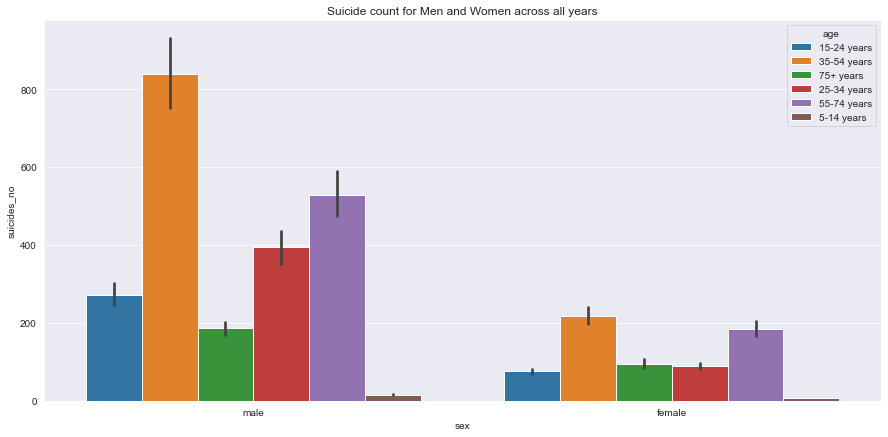

In [52]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x=data1['sex'],y=data1['suicides_no'],data=data1,
            hue='age')
ax.set_title('Suicide count for Men and Women across all years')

Text(0.5, 1.0, 'Suicide count for Men and Women across all Generation')

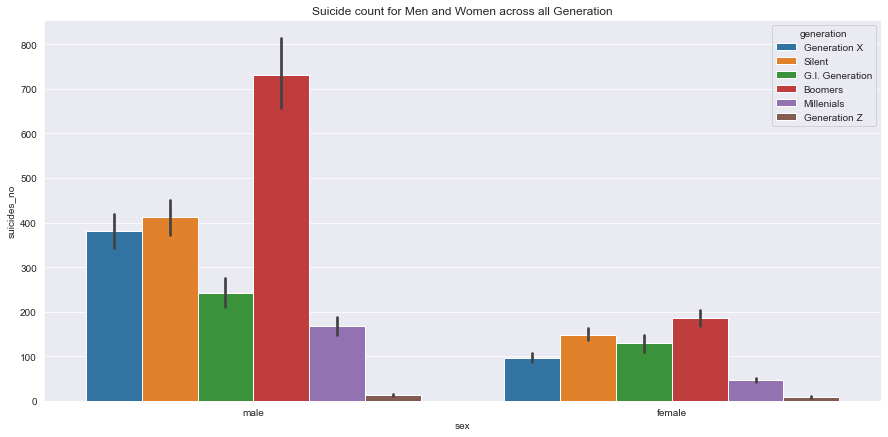

In [53]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x=data1['sex'],y=data1['suicides_no'],data=data1,
            hue='generation')
ax.set_title('Suicide count for Men and Women across all Generation')

•	What is the yearly trend of suicide numbers across all years?

Text(0.5, 1.0, 'Suicide Number for every Year recorded for Male and Female')

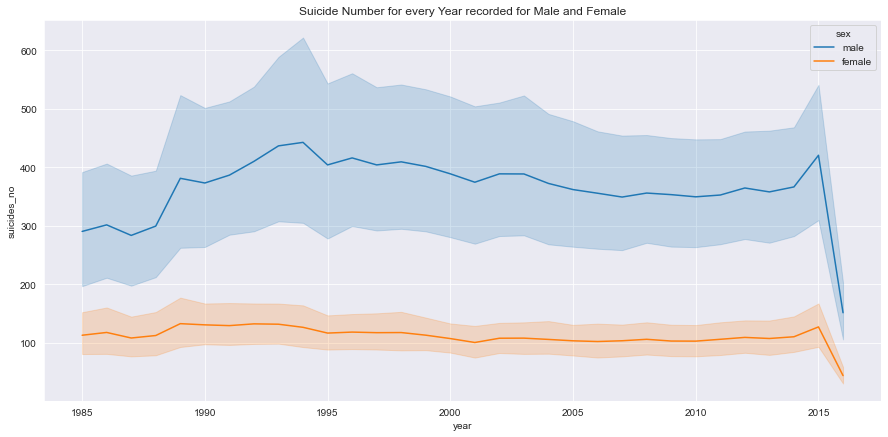

In [54]:
plt.figure(figsize=(15,7))

ax=sns.lineplot(x=data1['year'],y=data1['suicides_no'],data=data1,hue='sex')
ax.set_title('Suicide Number for every Year recorded for Male and Female')